In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn import cluster, datasets, mixture
from sklearn import metrics

from time import time
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# dataset = pd.read_csv("data/Aggregation.txt", delim_whitespace=True, header=None, names=["x", "y", "target"])
dataset = pd.read_csv("data/Aggregation.txt", delim_whitespace=True, header=None, names=["x", "y", "target"])
dataset

,x,y,target
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


In [3]:
dataset.isna().sum()

x         0
y         0
target    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       788 non-null    float64
 1   y       788 non-null    float64
 2   target  788 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.6 KB


In [5]:
dataset.describe()

,x,y,target
count,788.000000,788.000000,788.000000
mean,19.566815,14.171764,3.770305
std,9.922042,8.089683,1.596305
min,3.350000,1.950000,1.000000
25%,11.150000,7.037500,2.000000
50%,18.225000,11.725000,4.000000
75%,30.700000,21.962500,5.000000
max,36.550000,29.150000,7.000000


In [6]:
true_labels = dataset["target"].to_numpy()

In [7]:
data_raw = dataset.drop("target", axis=1)
print(data_raw.shape)
data_raw

(788, 2)


,x,y
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05
...,...,...
783,7.80,3.35
784,8.05,2.75
785,8.50,3.25
786,8.10,3.55


In [8]:
data = normalize(data_raw)
data = StandardScaler().fit_transform(data_raw)
data

array([[-0.40509461,  1.7908527 ],
       [-0.47064692,  1.65479068],
       [-0.51602929,  1.75374488],
       ...,
       [-1.11608509, -1.35094292],
       [-1.15642497, -1.3138351 ],
       [-1.15138249, -1.25817336]])

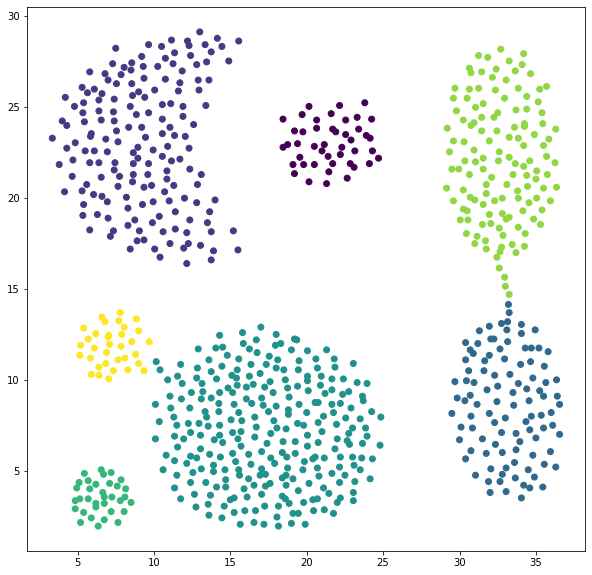

In [23]:
#Visualise data
plt.figure(figsize=(9 + 1, 10))
plt.scatter(data_raw.to_numpy()[:,0],data_raw.to_numpy()[:,1], label='True Position', c=true_labels)


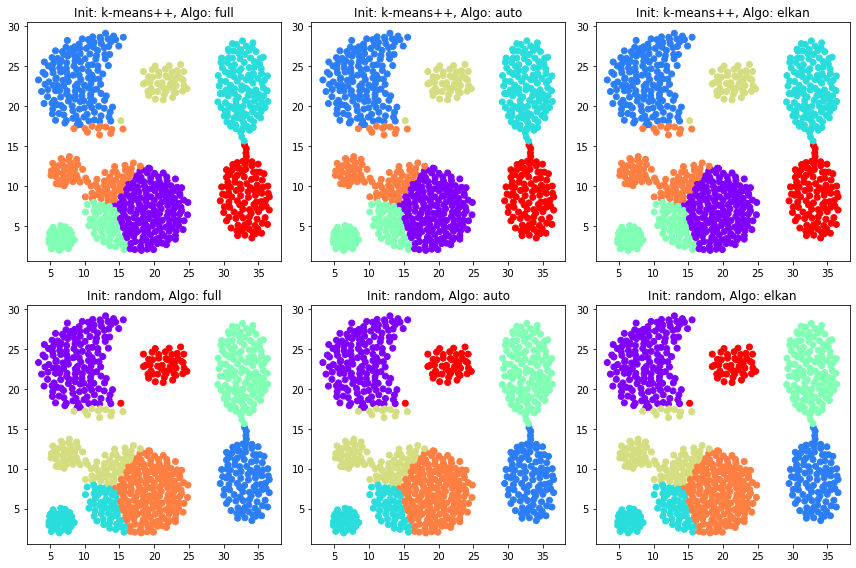

Init,Time,Inertia,Homo,Compl,V-meas,ARI,AMI,Silhouette
"Init: k-means++, Algo: full",0.236978,144.169303,0.880459,0.796345,0.836292,0.7293,0.834087,0.469638
"Init: k-means++, Algo: auto",0.304299,144.169303,0.880459,0.796345,0.836292,0.7293,0.834087,0.472451
"Init: k-means++, Algo: elkan",0.294678,144.169303,0.880459,0.796345,0.836292,0.7293,0.834087,0.472504
"Init: random, Algo: full",0.282421,144.169303,0.880459,0.796345,0.836292,0.7293,0.834087,0.482930
"Init: random, Algo: auto",0.228804,144.169303,0.880459,0.796345,0.836292,0.7293,0.834087,0.480896
"Init: random, Algo: elkan",0.229476,144.169303,0.880459,0.796345,0.836292,0.7293,0.834087,0.465150


In [26]:
from time import time
k=7
initializers = ['k-means++', 'random']
algorithms = ['full', 'auto', 'elkan']
resultsets = []

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        kmeans = KMeans(n_clusters=k, random_state=42, algorithm=algorithms[j], init=initializers[i], n_init=50, max_iter=500)
        name = f"Init: {initializers[i]}, Algo: {algorithms[j]}"

        t0 = time()
        kmeans.fit(data)
        fit_time = time() - t0
        results = [name, fit_time, kmeans.inertia_]

        # Define the metrics which require only the true labels and estimator labels
        clustering_metrics = [
            metrics.homogeneity_score,
            metrics.completeness_score,
            metrics.v_measure_score,
            metrics.adjusted_rand_score,
            metrics.adjusted_mutual_info_score,
        ]

        results += [m(true_labels, kmeans.labels_) for m in clustering_metrics]
        results += [ # The silhouette score
            metrics.silhouette_score(data, kmeans.labels_, metric="euclidean", sample_size=300,)
        ]
        resultsets.append(results)

        ax.scatter(data_raw.to_numpy()[:,0],data_raw.to_numpy()[:,1], c=kmeans.labels_, cmap='rainbow')
        ax.set_title(name)

plt.tight_layout()
plt.show()

stats = pd.DataFrame(resultsets, columns=["Init", "Time", "Inertia", "Homo", "Compl", "V-meas", "ARI", "AMI", "Silhouette"])
stats.set_index("Init")
from IPython.display import HTML
HTML(stats.to_html(index=False))

In [11]:
# # max_clusters = 0
# # clusters = None
# # best_labels = None
# # best_i = 0
# # best_j = 0

# best_completeness = 0
# best_sil = -1
# best_clusterer = None

# for i in np.arange(0.01,0.31, 0.001):
#     for j in range(1,40,1):
#         dbscan = DBSCAN(eps=i, min_samples=j).fit(data)
#         labels = dbscan.labels_
        
#         n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# #         n_noise = list(labels).count(-1)
#         if n_clusters in == 7:
#             sil = metrics.silhouette_score(data, labels)
#             print(i,j,sil)
#             plt.scatter(dataset.to_numpy()[:,0],dataset.to_numpy()[:,1], c=labels, cmap='rainbow')
#             plt.show()
#             completeness = metrics.completeness_score(true_labels, labels)
#             if completeness > best_completeness:
#             if sil > best_sil:
# #                 best_completeness = completeness
#                 best_sil = sil
#                 best_clusterer = dbscan
#             print("Silhouette Coefficient: %0.3f" % )
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#         u_labels = np.unique(labels)
#         if len(u_labels) in [7,8]:
#             max_clusters = len(u_labels)
#             clusters = u_labels
#             best_i = i
#             best_j = j
#             best_labels = labels
#             print(i, j, max_clusters)
#             plt.scatter(data_raw.to_numpy()[:,0],data_raw.to_numpy()[:,1], c=best_labels, cmap='rainbow')
#             plt.show()
        
# print(clusters, best_i, best_j)


5 clusters and 0 noise points


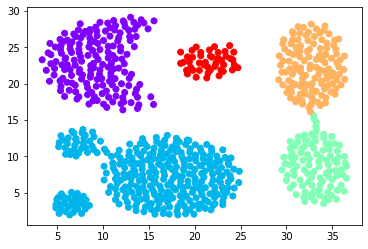

In [31]:
dbscan = DBSCAN(eps=0.35, min_samples=28).fit(data)
labels = dbscan.labels_
plt.scatter(dataset.to_numpy()[:,0],dataset.to_numpy()[:,1], c=labels, cmap='rainbow')
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"{n_clusters} clusters and {n_noise} noise points")

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_labels, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_labels, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_labels, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(true_labels, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(true_labels, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
      

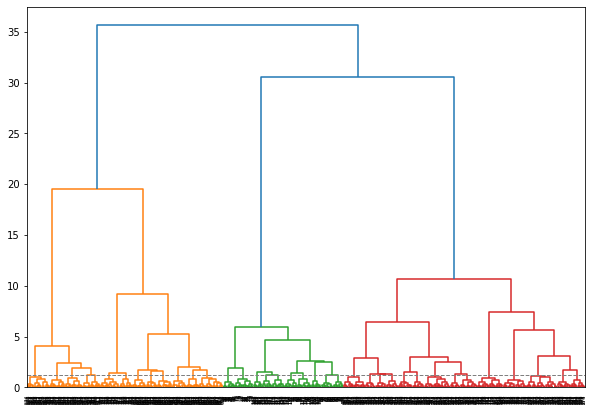

In [32]:
# Hierachical
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.axhline(y=1.25, c='grey', lw=1, linestyle='dashed')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [33]:
# Cluster based on the 5 cluster found in the hierachical clustering above
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

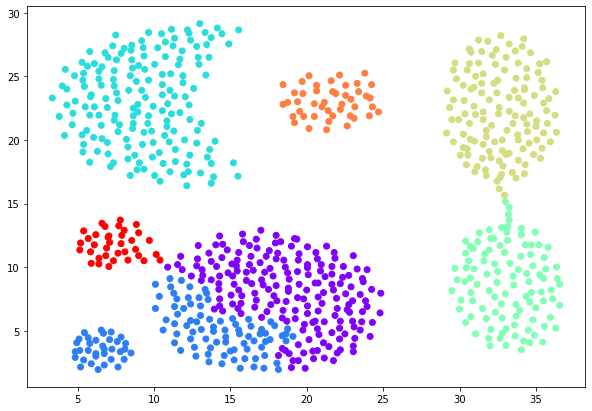

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(dataset.values[:,0], dataset.values[:,1], c=cluster.labels_, cmap='rainbow')

/home/morten/miniconda2/envs/dm870/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
/home/morten/miniconda2/envs/dm870/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
/home/morten/miniconda2/envs/dm870/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to No

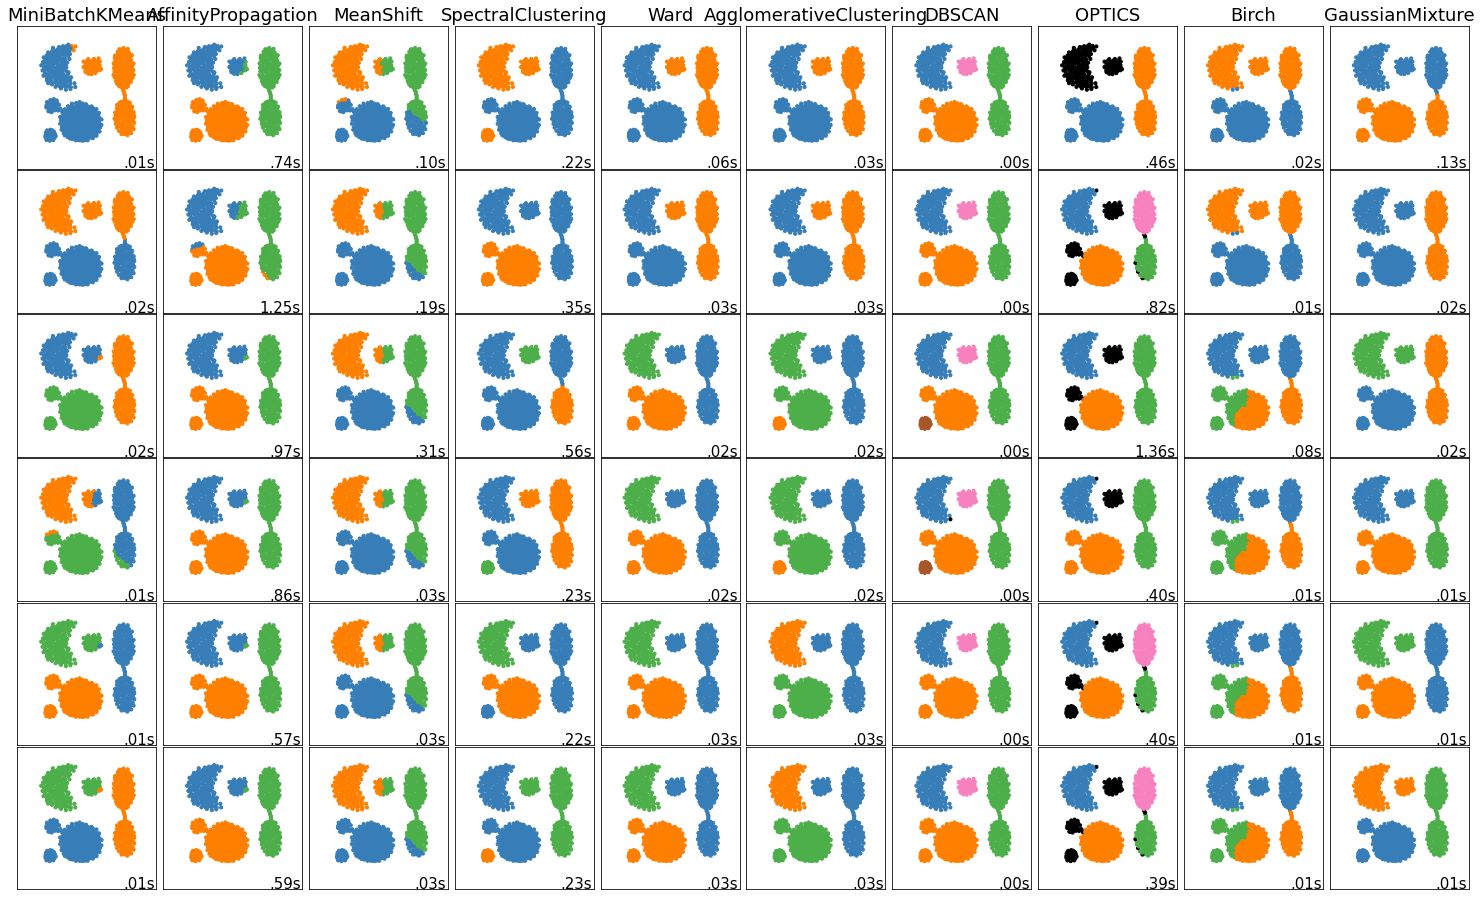

In [43]:
# Multiple clusterers

plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'random_state': None,
                'min_cluster_size': 0.1}

datasets = [
    (data_raw, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (data_raw, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (data_raw, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (data_raw, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (data_raw, {}),
    (data_raw, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X= dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

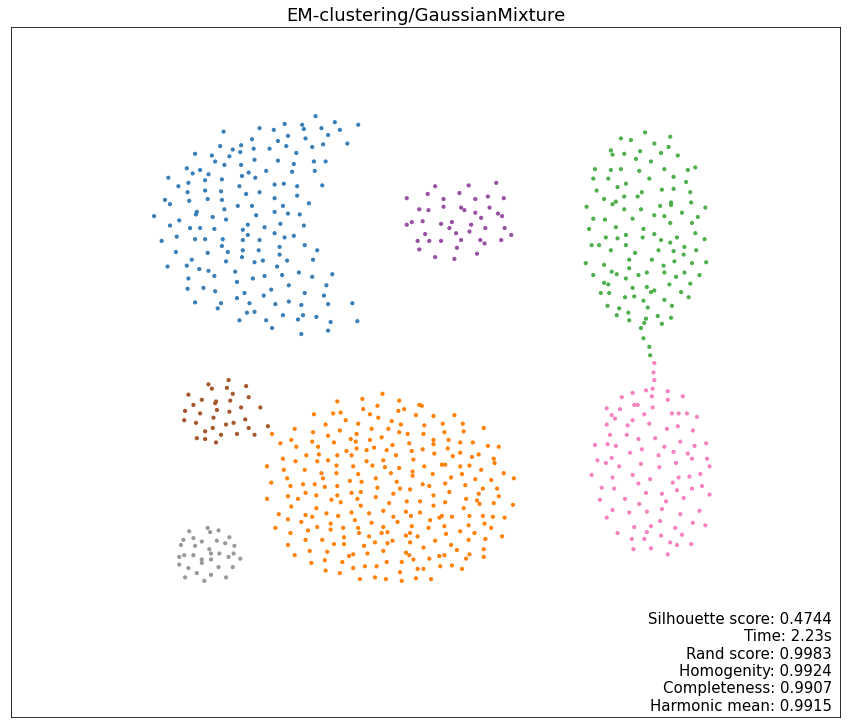

In [39]:
# plt.figure(figsize=(9 * 2 + 3, 10))
plt.figure(figsize=(9 + 3, 10))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 7,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1,
                'random_state': 42
               }

datasets = [
#     (data_raw, {'damping': .77, 'preference': -240,
#                      'quantile': .2,AgglomerativeClustering
#                      'min_samples': 20, 'xi': 0.25}),
#     (data_raw, {'damping': .75, 'preference': -220}),
#     (data_raw, {'eps': .18, 'n_neighbors': 2,
#               'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
#     (data_raw, {'eps': .15, 'n_neighbors': 2,
#              'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
#     (data_raw, {}),
    (data_raw, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
#     ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#     two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
#     ward = cluster.AgglomerativeClustering(
#         n_clusters=params['n_clusters'], linkage='ward',
#         connectivity=connectivity)
#     spectral = cluster.SpectralClustering(
#         n_clusters=params['n_clusters'], eigen_solver='arpack',
#         affinity="nearest_neighbors")
#     dbscan = cluster.DBSCAN(eps=params['eps'])
#     optics = cluster.OPTICS(min_samples=params['min_samples'],
#                             xi=params['xi'],
#                             min_cluster_size=params['min_cluster_size'])
#     affinity_propagation = cluster.AffinityPropagation(
#         damping=params['damping'], preference=params['preference'])
#     average_linkage = cluster.AgglomerativeClustering(
#         linkage="average", affinity="cityblock",
#         n_clusters=params['n_clusters'], connectivity=connectivity)
#     birch = cluster.Birch(n_clusters=params['n_clusters'])
#     gmm = mixture.GaussianMixture(
#         n_components=params['n_clusters'], covariance_type='full', n_init=20, max_iter=100)
#     gmm2 = mixture.GaussianMixture(
#         n_components=params['n_clusters'], covariance_type='tied')
#     gmm3 = mixture.GaussianMixture(
#         n_components=params['n_clusters'], covariance_type='diag')
    gmm4 = mixture.GaussianMixture(
        n_components=params['n_clusters'], tol=1e-5, covariance_type='spherical', n_init=100, max_iter=300, init_params="kmeans")
    
#         ('MiniBatchKMeans', two_means),
#         ('AffinityPropagation', affinity_propagation),
#         ('MeanShift', ms),
#         ('SpectralClustering', spectral),
#         ('Ward', ward),
#         ('AgglomerativeClustering', average_linkage),
#         ('DBSCAN', dbscan),
#         ('OPTICS', optics),
#         ('Birch', birch),
#         ('GaussianMixture', gmm),
#         ('GaussianMixture', gmm2),
#         ('GaussianMixture', gmm3),
    
    clustering_algorithms = [
        ('EM-clustering/GaussianMixture', gmm4)
    ]

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        sil = metrics.silhouette_score(X, y_pred)
        
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        
        info = (
            f"Silhouette score: {sil:.4f}\n"
            f"Time: {(t1 - t0):.2f}s\n"
            f"Rand score: {metrics.rand_score(true_labels, y_pred):.4f}\n"
            f"Homogenity: {metrics.homogeneity_score(true_labels, y_pred):.4f}\n"
            f"Completeness: {metrics.completeness_score(true_labels, y_pred):.4f}\n"
            f"Harmonic mean: {metrics.v_measure_score(true_labels, y_pred):.4f}"
        )
        
        plt.text(.99, .01, info,
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [40]:
gmm4.get_params()

{'covariance_type': 'spherical',
 'init_params': 'kmeans',
 'max_iter': 300,
 'means_init': None,
 'n_components': 7,
 'n_init': 100,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 1e-05,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}